In [47]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import geopandas as gpd
import os
import importlib
import tweepy
import datetime
import re
import pickle
import matplotlib.pyplot as plt
from tweepy import OAuthHandler
import funcs as fs
import requests
import gps
import unidecode

### API params from file

In [252]:
importlib.reload(gps)
importlib.reload(fs)

<module 'funcs' from 'C:\\Users\\Mag\\Documents\\_projekty\\2018 11 Twitter\\funcs.py'>

In [2]:
ap = fs.set_api('tw_auth.csv')

### Dowloading tweets
Subject = KNF.

In [3]:
knf_t = fs.load_tweets(ap, 'knf', 10000, 1)

500  at  2018-12-02 12:30:46.100356
1000  at  2018-12-02 12:30:58.299611
1500  at  2018-12-02 12:31:10.265580
2000  at  2018-12-02 12:31:24.058846
2500  at  2018-12-02 12:31:37.250631


Rate limit reached. Sleeping for: 829


3000  at  2018-12-02 12:45:44.190779
3500  at  2018-12-02 12:45:57.757225
4000  at  2018-12-02 12:46:09.806117
4500  at  2018-12-02 12:46:20.972093
5000  at  2018-12-02 12:46:32.256719


Rate limit reached. Sleeping for: 830


Got 10000 tweets about "knf" with author's location
Total time:  0:30:06.525893


In [7]:
knf_t = knf_t.dropna()
len(knf_t)

2557

In [8]:
knf_t.head(30)

,tw_text,location,user_id,user_name,fav_cnt,friends_cnt,foll_cnt
1,"Oni są tak zdemoralizowani, że jeśli ktoś nakr...",Warszawa/Stockholm 🇮🇩,1726096375,Starosta Melsztyński 🇲🇨,1517,42,1022
4,Lubnauer o aferze KNF: To afera Kaczyńskiego. ...,Warszawa,361423602,300Polityka,692,2458,73071
5,"""Skok do KNF. Filip Czuchwicki całą karierę zw...",Żory/Silesia/Ostrava,1054134921671987200,Majkella 2.0,5821,797,1121
6,@KrzyLuft Ma Pan absolutnie rację! Jest to rów...,Przylądek Dobrej Nadziei,954050424943841282,Wojtek Skalski,23046,135,158
9,Selin z @pisorgpl totalnie się kompromituje w ...,"Warszawa, Polska",1032650667272364032,OSTRZEGAM PRZED JAKIM,15,74,23
10,"Sellin: Nie widać żadnego powodu, żeby szukać ...",Warszawa,361423602,300Polityka,692,2458,73071
16,@michalrachon @tvp_info KNF kuffa !!!!,PiŚlandia od niedawna,3296757069,Rafaelrr,4254,271,58
17,@tomwu74 Jest upadłym szefem KNF #KnŁ #Sellin,"Mazowieckie, Polska",4854596229,Lena,13954,302,347
19,@TeryAsic1 @zabka1955 @Margherita_PPP Zrozum ż...,"Mazowieckie, Polska",971518403734274048,Sławek Kuziak,1990,417,144
20,@NewsweekPolska Komisja to raczej do planu mil...,"Piastów, Polska",1067533624696819713,Gosia,0,1,0


### Adding location
New function from gps class

In [24]:
finder = gps.finder()

In [25]:
knf_t['state'] = knf_t['location'].apply(finder.get_state)

In [29]:
knf_t.head(30)
#len(knf_t[knf_t.state!=''])

,tw_text,location,user_id,user_name,fav_cnt,friends_cnt,foll_cnt,state
1,"Oni są tak zdemoralizowani, że jeśli ktoś nakr...",Warszawa/Stockholm 🇮🇩,1726096375,Starosta Melsztyński 🇲🇨,1517,42,1022,mazowieckie
4,Lubnauer o aferze KNF: To afera Kaczyńskiego. ...,Warszawa,361423602,300Polityka,692,2458,73071,mazowieckie
5,"""Skok do KNF. Filip Czuchwicki całą karierę zw...",Żory/Silesia/Ostrava,1054134921671987200,Majkella 2.0,5821,797,1121,slaskie
6,@KrzyLuft Ma Pan absolutnie rację! Jest to rów...,Przylądek Dobrej Nadziei,954050424943841282,Wojtek Skalski,23046,135,158,
9,Selin z @pisorgpl totalnie się kompromituje w ...,"Warszawa, Polska",1032650667272364032,OSTRZEGAM PRZED JAKIM,15,74,23,mazowieckie
10,"Sellin: Nie widać żadnego powodu, żeby szukać ...",Warszawa,361423602,300Polityka,692,2458,73071,mazowieckie
16,@michalrachon @tvp_info KNF kuffa !!!!,PiŚlandia od niedawna,3296757069,Rafaelrr,4254,271,58,
17,@tomwu74 Jest upadłym szefem KNF #KnŁ #Sellin,"Mazowieckie, Polska",4854596229,Lena,13954,302,347,mazowieckie
19,@TeryAsic1 @zabka1955 @Margherita_PPP Zrozum ż...,"Mazowieckie, Polska",971518403734274048,Sławek Kuziak,1990,417,144,mazowieckie
20,@NewsweekPolska Komisja to raczej do planu mil...,"Piastów, Polska",1067533624696819713,Gosia,0,1,0,mazowieckie


In [104]:
knf_t_l = knf_t[knf_t.state!='']
len(knf_t_l)

1892

#### Dane do map

In [50]:
pl_woj = gpd.read_file('woj.shp')
pl_woj = pl_woj[['jpt_nazwa_', 'geometry']].rename(columns={'jpt_nazwa_' : 'state'})
pl_woj['state'] = pl_woj['state'].apply(unidecode.unidecode)


In [70]:
knf_agg = pd.merge(pl_woj, pd.DataFrame(knf_t_l.groupby('state')['tw_text'].agg({'cnt' :'size'}).reset_index()),  on='state')


C:\Users\Mag\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


In [71]:
knf_agg

,state,geometry,cnt
0,opolskie,"POLYGON ((351531.3570542663 289023.6339908298,...",28
1,swietokrzyskie,"POLYGON ((549668.108223389 320839.8468403742, ...",15
2,kujawsko-pomorskie,"POLYGON ((383436.88102724 613642.8506025421, 3...",50
3,mazowieckie,"POLYGON ((517613.878040235 508554.134765977, 5...",885
4,slaskie,(POLYGON ((555951.3387101158 327976.5435710084...,143
5,warminsko-mazurskie,"POLYGON ((508453.7807559089 637510.0399788385,...",12
6,zachodniopomorskie,"POLYGON ((171677.5552177691 563602.5222216407,...",46
7,dolnoslaskie,"POLYGON ((205901.1020087924 343181.9550380595,...",128
8,wielkopolskie,"POLYGON ((281964.3368720217 535152.7505267244,...",129
9,lodzkie,"POLYGON ((435569.1798715355 387437.0388484262,...",101


#### Skąd tweety o KNF?

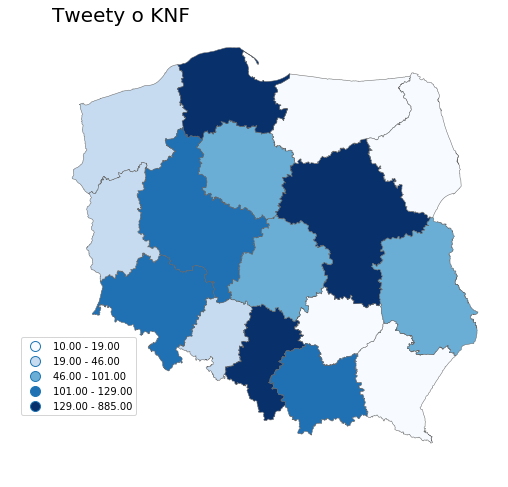

In [253]:
basic_map(knf_agg, 'cnt', title="Tweety o KNF")

### Text modifications


In [145]:
knf_t_l = knf_t[knf_t.state!=''].reset_index().drop('index', axis=1).drop('text_mod', axis=1)
len(knf_t_l)

1892

In [168]:
knf_t_l.no_excl.agg('sum')

240

In [ ]:
# przenoszę osobno bo bardzo wolne :/
knf_t_l['no_excl'] = [0 for i in range(len(knf_t_l))]
knf_t_l['no_quest'] = [0 for i in range(len(knf_t_l))]

for i in range(len(knf_t_l)):
    no_excl = len(re.findall('!', knf_t_l.tw_text[i]))
    no_quest = len(re.findall('\?', knf_t_l.tw_text[i]))
    knf_t_l['no_excl'][i] = no_excl
    knf_t_l['no_quest'][i] = no_quest

In [172]:
knf_t_l['text_mod']=knf_t_l['tw_text']
knf_t_l['tw_len'] = knf_t_l.tw_text.apply(len)


for i in range(len(knf_t_l)):
    t_mod = re.sub('@\w+', ' ', knf_t_l.tw_text[i])
    t_mod = re.sub('#\w+', ' ', t_mod)
    t_mod = re.sub(r'https://[\w./]+', ' ', t_mod)
    t_mod = re.sub('\d', ' ', t_mod)
    t_mod = re.sub('\W', ' ', t_mod)
    t_mod = re.sub('\s+', ' ', t_mod)
    knf_t_l['text_mod'][i]=t_mod

  

C:\Users\Mag\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [174]:
for i in range(len(knf_t_l)):
    t_mod = re.sub(' [a-zA-Z] ', ' ', knf_t_l.text_mod[i])
    t_mod = re.sub('\s+', ' ', t_mod)
    knf_t_l['text_mod'][i]=t_mod

C:\Users\Mag\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [175]:
for i in range(10):
    print(knf_t_l.tw_text[i])
    print(knf_t_l.text_mod[i])
    print('\n')

Oni są tak zdemoralizowani, że jeśli ktoś nakręci film o aferze KNF Glapiński będzie domagał sie tantiem.
Oni są tak zdemoralizowani że jeśli ktoś nakręci film aferze KNF Glapiński będzie domagał sie tantiem 


Lubnauer o aferze KNF: To afera Kaczyńskiego. Pozwala się na system, gdzie wszystkie instytucje państwa są przejmowane przez partyjniaków

#300POLITYKALIVE

https://t.co/JHYbWyhVjh https://t.co/xvW4AElO96
Lubnauer aferze KNF To afera Kaczyńskiego Pozwala się na system gdzie wszystkie instytucje państwa są przejmowane przez partyjniaków 


"Skok do KNF. Filip Czuchwicki całą karierę związał ze SKOK-ami i ludźmi SKOK-ów. Teraz je nadzoruje"
 https://t.co/5aoYLFaLGN
 Skok do KNF Filip Czuchwicki całą karierę związał ze SKOK ami ludźmi SKOK ów Teraz je nadzoruje 


Selin z @pisorgpl totalnie się kompromituje w @tvn24. Afera KNF jest tu i teraz. Zostaliście złapani na kradzieży. Nie uciekniecie od tematu retoryką bo ktoś kiedyś też. KLAMCY I ZLODZIEJE 📛📛📛📛📛#pis #wieszwiecej
Selin tot

#### Removing polish stopwords

In [ ]:
knf_t_l

In [179]:
stopwords = open('stopq.txt','r').read().split()

for i in range(len(knf_t_l)):
    knf_t_l['text_mod'].loc[i] = ' '.join([word.lower() for word in knf_t_l['text_mod'].loc[i].split() if word.lower() not in stopwords])

knf_t_l['tw_mod_len'] = knf_t_l.text_mod.apply(len)  

C:\Users\Mag\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [180]:
for i in range(10):
    print(knf_t_l.tw_text[i])
    print(knf_t_l.text_mod[i])
    print('\n')

Oni są tak zdemoralizowani, że jeśli ktoś nakręci film o aferze KNF Glapiński będzie domagał sie tantiem.
zdemoralizowani nakręci film aferze knf glapiński domagał tantiem


Lubnauer o aferze KNF: To afera Kaczyńskiego. Pozwala się na system, gdzie wszystkie instytucje państwa są przejmowane przez partyjniaków

#300POLITYKALIVE

https://t.co/JHYbWyhVjh https://t.co/xvW4AElO96
lubnauer aferze knf afera kaczyńskiego pozwala system instytucje państwa przejmowane partyjniaków


"Skok do KNF. Filip Czuchwicki całą karierę związał ze SKOK-ami i ludźmi SKOK-ów. Teraz je nadzoruje"
 https://t.co/5aoYLFaLGN
skok knf filip czuchwicki całą karierę związał skok ami ludźmi skok ów nadzoruje


Selin z @pisorgpl totalnie się kompromituje w @tvn24. Afera KNF jest tu i teraz. Zostaliście złapani na kradzieży. Nie uciekniecie od tematu retoryką bo ktoś kiedyś też. KLAMCY I ZLODZIEJE 📛📛📛📛📛#pis #wieszwiecej
selin totalnie kompromituje afera knf zostaliście złapani kradzieży uciekniecie tematu retoryką kie

In [186]:
## saving to pickle

with open('knf.pickle','wb') as f:
    pickle.dump(knf_t_l,f)

In [187]:
with open('knf.pickle', 'rb') as f:
    test = pickle.load(f)

test.head()

,tw_text,location,user_id,user_name,fav_cnt,friends_cnt,foll_cnt,state,text_mod,tw_len,no_excl,no_quest,tw_mod_len
0,"Oni są tak zdemoralizowani, że jeśli ktoś nakr...",Warszawa/Stockholm 🇮🇩,1726096375,Starosta Melsztyński 🇲🇨,1517,42,1022,mazowieckie,zdemoralizowani nakręci film aferze knf glapiń...,105,0,0,65
1,Lubnauer o aferze KNF: To afera Kaczyńskiego. ...,Warszawa,361423602,300Polityka,692,2458,73071,mazowieckie,lubnauer aferze knf afera kaczyńskiego pozwala...,204,0,0,97
2,"""Skok do KNF. Filip Czuchwicki całą karierę zw...",Żory/Silesia/Ostrava,1054134921671987200,Majkella 2.0,5821,797,1121,slaskie,skok knf filip czuchwicki całą karierę związał...,126,0,0,80
3,Selin z @pisorgpl totalnie się kompromituje w ...,"Warszawa, Polska",1032650667272364032,OSTRZEGAM PRZED JAKIM,15,74,23,mazowieckie,selin totalnie kompromituje afera knf zostaliś...,211,0,0,119
4,"Sellin: Nie widać żadnego powodu, żeby szukać ...",Warszawa,361423602,300Polityka,692,2458,73071,mazowieckie,sellin widać żadnego powodu szukać politycznie...,230,0,0,132


#### Adding some aggregates

In [188]:
knf_t_l['words_cnt'] = [len(text.split()) for text in knf_t_l.text_mod]


In [204]:
knf_t_l['avg_w_l'] = knf_t_l['text_mod'].apply(lambda x: np.mean([len(word) for word in x.split()]) )

C:\Users\Mag\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


In [221]:
knf_t_l['kacz_cnt'] = knf_t_l['text_mod'].apply(lambda x: 1*hasattr(re.search('kaczy[nń]ski',x), 'start'))

In [222]:
knf_t_l['tusk_cnt'] = knf_t_l['text_mod'].apply(lambda x: 1*hasattr(re.search('tusk',x), 'start'))

In [225]:
knf_t_l['len_ratio'] = knf_t_l['tw_mod_len']/knf_t_l['tw_len']

In [233]:
knf_t_l_means = knf_t_l.groupby('state')['tw_len', 'no_excl', 'no_quest', 'tw_mod_len', 'words_cnt', 'avg_w_l', 'kacz_cnt', 'tusk_cnt', 'len_ratio'].agg(np.mean)

In [234]:
knf_t_l_sums = knf_t_l.groupby('state')['kacz_cnt', 'tusk_cnt'].agg(sum)

In [238]:
knf_plots = pd.merge(pl_woj, knf_t_l_means.reset_index(), on='state')

### Analysis of users

In [239]:
knf_plots.head(1)

,state,geometry,tw_len,no_excl,no_quest,tw_mod_len,words_cnt,avg_w_l,kacz_cnt,tusk_cnt,len_ratio
0,opolskie,"POLYGON ((351531.3570542663 289023.6339908298,...",130.428571,0.142857,0.178571,80.285714,10.428571,6.673556,0.035714,0.0,0.601539


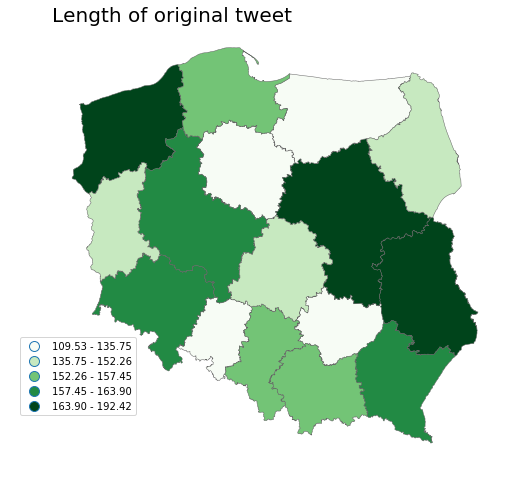

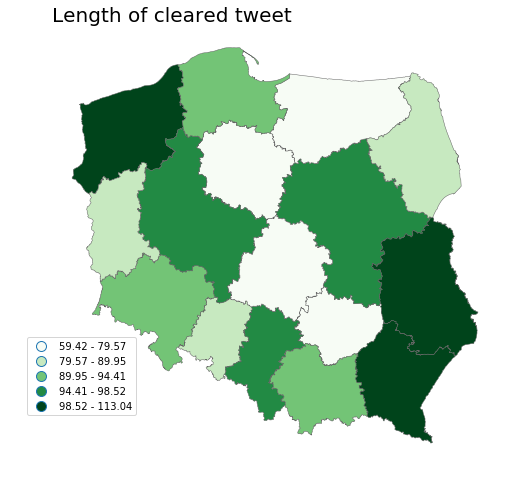

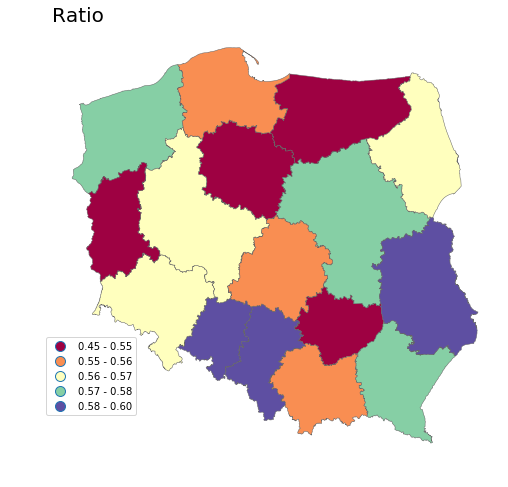

In [283]:
basic_map(knf_plots, 'tw_len', title="Length of original tweet", cmap='Greens')
basic_map(knf_plots, 'tw_mod_len', title="Length of cleared tweet", cmap='Greens')
basic_map(knf_plots, 'len_ratio', title="Ratio", cmap='Spectral')


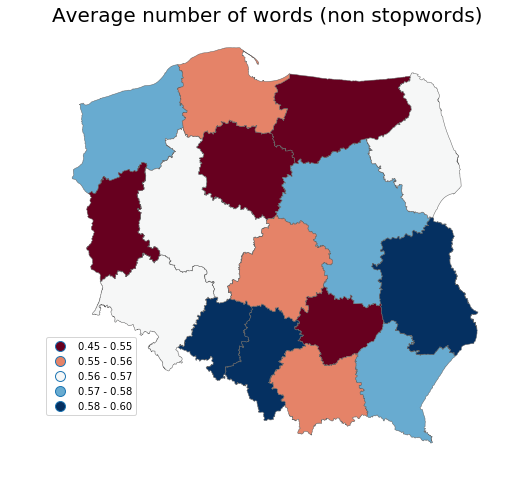

In [284]:
basic_map(knf_plots, 'len_ratio', title="Average number of words (non stopwords)", cmap='RdBu')

In [275]:
knf_plots.head(1)

,state,geometry,tw_len,no_excl,no_quest,tw_mod_len,words_cnt,avg_w_l,kacz_cnt,tusk_cnt,len_ratio
0,opolskie,"POLYGON ((351531.3570542663 289023.6339908298,...",130.428571,0.142857,0.178571,80.285714,10.428571,6.673556,0.035714,0.0,0.601539


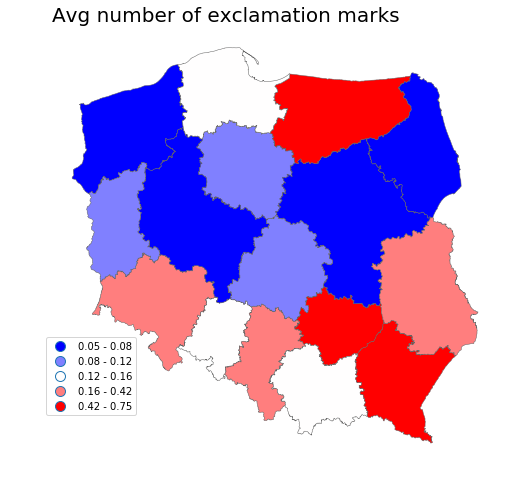

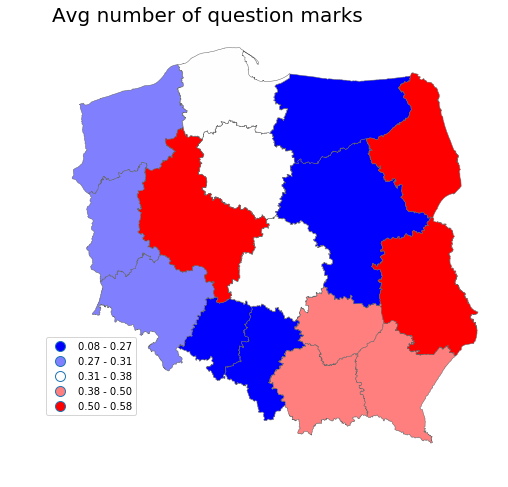

In [281]:
basic_map(knf_plots, 'no_excl', title="Avg number of exclamation marks", cmap='bwr')
basic_map(knf_plots, 'no_quest', title="Avg number of question marks", cmap='bwr')


In [ ]:
basic_map(knf_plots, 'no_excl', title="Avg number of exclamation marks", cmap='YlOrBr')
basic_map(knf_plots, 'no_quest', title="Avg number of question marks", cmap='YlOrBr')

In [285]:
usr_agg = knf_t_l.groupby('user_name').agg('size')

In [289]:
usr_agg.sort_values(ascending=False)

user_name
PolskieRadio24.pl                    38
Michał Mostowy                       30
300Polityka                          27
Business Insider PL                  19
Dariusz Szumiński                    16
Tomek Niewęgłowski                   16
Janusz Walczak                       15
Janusz Cichy                         15
Gazeta Wyborcza.pl                   15
Łukasz Olejnik                       15
Helena (*=*) 🍀                       14
Piotr R. J. Darowny    🇵🇱   🇪🇺       13
Gosia                                13
Radio Maryja                         13
nieznajomy                           12
Niezalezna.PL                        12
Elżbieta - Dorota Wilczyńska         12
Adrian Tomaszkiewicz                 12
DoRzeczy                             11
Andrzej Kossowski                    11
Iwo🎭San                              11
SKOK na Amber Gold                   11
portal tvp.info 🇵🇱                   11
Kropka Nad I                         11
Władysław Opiat               